In [325]:
from gurobipy import *
import numpy as np
import pandas as pd

### Import Data

In [326]:
area = pd.read_csv('Pb2_areas.csv', index_col=None, header=None).values
shelter = pd.read_csv('Pb2_shelters.csv', index_col=None, header=None).values

In [327]:
print(area.shape, shelter.shape)

(200, 3) (40, 3)


### Data Set Up

In [328]:
i = 200 # 200 area, i
j = 40 # 40 shelter, j

a = range(i) #i
sh = range(j) #j

In [329]:
# Area population 
demand = []
for i in a:
    demand.append(area[i][-1])

demand = np.array(demand)

# shelter capacity in thousands of units
capacity = []
for j in sh:
    capacity.append(shelter[j][-1])

capacity = np.array(capacity)


# distance between each capacity 
# distance matrixs shape is i*j. 

distance = np.zeros(shape=(200,40))

for i in a:
    for j in sh: 
        distance[i][j] = abs(area[i][0] - shelter[j][0]) + abs(area[i][1] - shelter[j][1])


distance

array([[ 5.38388,  5.8124 ,  7.5175 , ..., 17.71006, 10.5917 , 17.1904 ],
       [18.77838, 16.6555 , 12.038  , ...,  6.09556,  8.9638 , 10.1169 ],
       [13.80798,  7.2219 ,  6.8548 , ...,  9.28596,  3.2164 ,  7.0685 ],
       ...,
       [10.38538, 10.7425 ,  6.125  , ..., 17.33236,  4.83   ,  3.5479 ],
       [18.35578,  7.1595 , 11.4026 , ...,  4.73816,  7.7642 ,  9.6943 ],
       [15.79708, 12.0308 ,  8.8439 , ...,  7.29686,  5.2055 ,  7.1356 ]])

In [330]:
model = Model("Shelter")

In [331]:
#for shelter is open
x = model.addVars(sh, vtype = GRB.BINARY)
#for connection is build 
y = model.addVars(a, sh, vtype = GRB.BINARY)


In [332]:
#objFn = LinExpr()

#objFn += sum(sum(distance[i,j] * y[i,j] for i in a) for j in sh)
#model.setObjective(objFn, GRB.MINIMIZE)

In [333]:
model.setObjective(sum(sum(distance[i,j] * y[i,j]*x[j] for i in a) for j in sh), GRB.MINIMIZE)

### Add Constranit

In [334]:
# Sum of assigned area popualiton less or equal capacity.
for j in sh:
     model.addConstr(sum(x[j]*y[i,j]*demand[i] for i in a) <= capacity[j])



In [335]:
#We want to assigne every area
for i in a:
    model.addConstr(sum(y[i,j]*x[j] for j in sh) == 1)

In [336]:
model.addConstr(sum(x[j] for j in sh) <= 10)

<gurobi.Constr *Awaiting Model Update*>

### Solve Model 

In [337]:
model.Params.TimeLimit = 60 # seconds
# Solve
model.optimize()

Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 8040 columns and 40 nonzeros
Model fingerprint: 0xd5fd23e5
Model has 8000 quadratic objective terms
Model has 240 quadratic constraints
Variable types: 0 continuous, 8040 integer (8040 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 7e+02]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-02, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
  QRHS range       [1e+00, 2e+04]
Presolve time: 0.33s
Presolved: 24241 rows, 16040 columns, 72040 nonzeros
Variable types: 0 continuous, 16040 integer (16040 binary)
Found heuristic solution: objective 1284.9669104

Root relaxation: objective 4.708529e+02, 1436 iterations, 0.46 seconds

    Nodes    |    Current Node    |  

In [338]:
print("Objective value, total distance = ", model.objVal)

Objective value, total distance =  477.26866039000015


### Question 3 implementation

In [339]:
#### set up model 2

m2 = Model("MinMax")

In [340]:

#for shelter is open
x2 = m2.addVars(sh, vtype = GRB.BINARY)
#for connection is build 
y2 = m2.addVars(a, sh, vtype = GRB.BINARY)

# distance variables d
md = m2.addVar(lb=0.0)

### set upobjective function

In [341]:
m2.setObjective(md, GRB.MINIMIZE)

In [342]:
# Sum of assigned area popualiton less or equal capacity.
for j in sh:
     m2.addConstr(sum(x2[j]*y2[i,j]*demand[i] for i in a) <= capacity[j])

#We want to assigne every area
for i in a:
    m2.addConstr(sum(y2[i,j]*x2[j] for j in sh) == 1)
    
m2.addConstr(sum(x2[j] for j in sh) <= 10)


<gurobi.Constr *Awaiting Model Update*>

In [343]:
for i in a:
    for j in sh:
        m2.addConstr(md >= distance[i,j] * y2[i,j])


In [344]:
model.Params.TimeLimit = 60 # seconds
# Solve
m2.optimize()

Parameter TimeLimit unchanged
   Value: 60.0  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 8001 rows, 8041 columns and 16040 nonzeros
Model fingerprint: 0x75d06ed7
Model has 240 quadratic constraints
Variable types: 1 continuous, 8040 integer (8040 binary)
Coefficient statistics:
  Matrix range     [3e-02, 3e+01]
  QMatrix range    [1e+00, 7e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
  QRHS range       [1e+00, 2e+04]
Presolve time: 0.14s
Presolved: 32241 rows, 16041 columns, 88040 nonzeros
Variable types: 1 continuous, 16040 integer (16040 binary)
Found heuristic solution: objective 24.9504500

Root relaxation: objective 1.249370e+00, 2755 iterations, 0.35 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent   

In [346]:
print("Objective value, total distance = ", m2.objVal)

Objective value, total distance =  5.3438


### Solution 1

In [347]:

    
#print("Shipment decisions: plant number, market number, shipment quantity")


for i in a:
    for j in sh:
        if distance[i,j] *y[i,j].x >0:
            print("Area ", i, " to shelter ", j, ": ", distance[i,j] *y[i,j].x)

Area  0  to shelter  11 :  1.24937
Area  1  to shelter  22 :  0.4214999999999982
Area  2  to shelter  10 :  2.4814999999999983
Area  3  to shelter  2 :  4.043300000000001
Area  4  to shelter  4 :  2.03986
Area  5  to shelter  27 :  1.1733000000000011
Area  6  to shelter  0 :  1.9803800000000003
Area  7  to shelter  4 :  1.1332749999999998
Area  8  to shelter  0 :  3.65708
Area  9  to shelter  2 :  2.9401
Area  10  to shelter  2 :  1.6388000000000007
Area  11  to shelter  22 :  3.1265
Area  12  to shelter  22 :  2.0680000000000014
Area  13  to shelter  26 :  2.0993000000000004
Area  14  to shelter  4 :  2.85424
Area  15  to shelter  27 :  3.877200000000002
Area  16  to shelter  27 :  4.898300000000001
Area  17  to shelter  14 :  3.7631973899999998
Area  18  to shelter  22 :  1.7884000000000002
Area  19  to shelter  2 :  2.3957999999999995
Area  20  to shelter  11 :  2.2567700000000004
Area  21  to shelter  24 :  2.6787
Area  22  to shelter  11 :  0.7726799999999998
Area  23  to shelter 

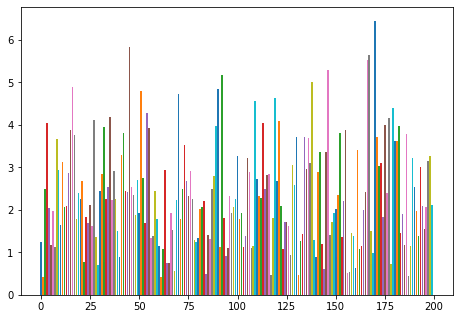

In [348]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i in a:
    for j in sh:
        if distance[i,j] *y[i,j].x >0:
            ax.bar(i,distance[i,j] *y[i,j].x)
plt.show()

### Solution 2

In [350]:
for i in a:
    for j in sh:
        if distance[i,j] *y2[i,j].x >0:
            print("Plant ", i, " ships to market ", j, ": ", distance[i,j] *y2[i,j].x)

Plant  0  ships to market  11 :  1.24937
Plant  1  ships to market  36 :  5.2741999999999996
Plant  2  ships to market  10 :  2.4814999999999983
Plant  3  ships to market  27 :  5.2219
Plant  4  ships to market  11 :  3.68733
Plant  5  ships to market  27 :  1.1733000000000011
Plant  6  ships to market  0 :  1.9803800000000003
Plant  7  ships to market  33 :  3.836705
Plant  8  ships to market  0 :  3.65708
Plant  9  ships to market  6 :  3.0862
Plant  10  ships to market  6 :  4.387499999999999
Plant  11  ships to market  29 :  3.9032999999999998
Plant  12  ships to market  3 :  3.9064000000000023
Plant  13  ships to market  3 :  4.930600000000001
Plant  14  ships to market  11 :  2.87295
Plant  15  ships to market  27 :  3.877200000000002
Plant  16  ships to market  27 :  4.898300000000001
Plant  17  ships to market  33 :  0.3715073900000002
Plant  18  ships to market  24 :  4.481399999999999
Plant  19  ships to market  0 :  4.55738
Plant  20  ships to market  11 :  2.256770000000000

Plant  193  ships to market  33 :  4.718389999999999
Plant  194  ships to market  33 :  4.82719
Plant  195  ships to market  11 :  5.01357
Plant  196  ships to market  36 :  1.0229999999999977
Plant  197  ships to market  27 :  3.1402
Plant  198  ships to market  36 :  4.307200000000001
Plant  199  ships to market  29 :  4.433000000000002


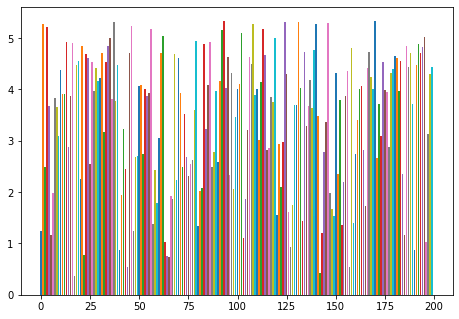

In [349]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i in a:
    for j in sh:
        if distance[i,j] *y2[i,j].x >0:
            ax.bar(i,distance[i,j] *y2[i,j].x)
plt.show()